----
# **RANDOM FOREST**
-----

### OBJECTIVE :

####  Use the Glass dataset and apply the Random forest model

### TASKS :

##### DATA PREPROCESSING :

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [9]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
df=pd.read_csv('mushroom.csv')

In [12]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [14]:
df.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [15]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


####  EXPLORATORY DATA ANALYSIS (EDA) :

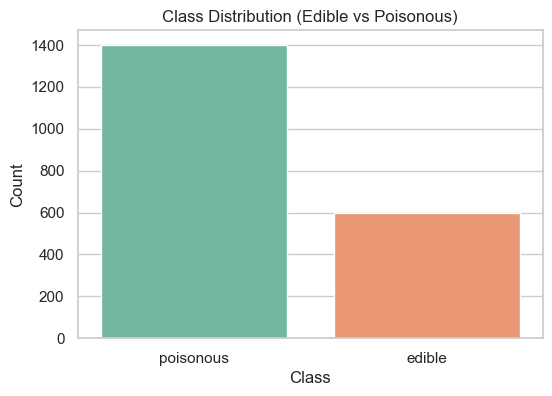

In [17]:
# Set up plotting style
sns.set(style="whitegrid")

# Visualizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

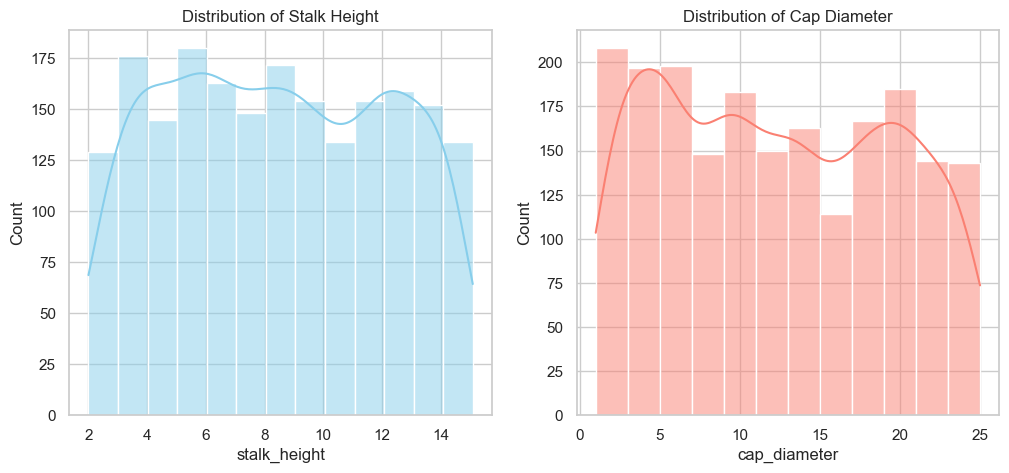

In [18]:
# Histograms for numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['stalk_height'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of Stalk Height")
sns.histplot(df['cap_diameter'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of Cap Diameter")
plt.show()

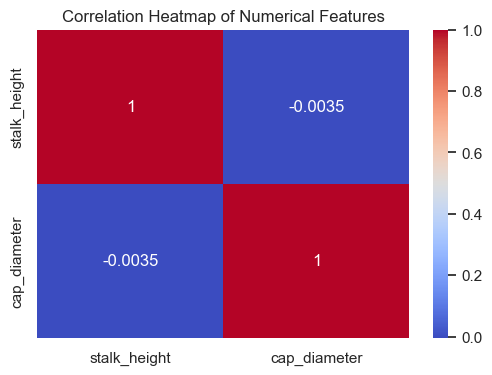

In [19]:
# Correlation heatmap for numerical features
plt.figure(figsize=(6, 4))
sns.heatmap(df[['stalk_height', 'cap_diameter']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

#### SVM Implementation :

In [21]:
# Encoding categorical variables using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [22]:
# Split dataset into features and target variable
X = df.drop(columns=['class'])
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 25), (400, 25), (1600,), (400,))

####  FEATURE ENGINEERING :

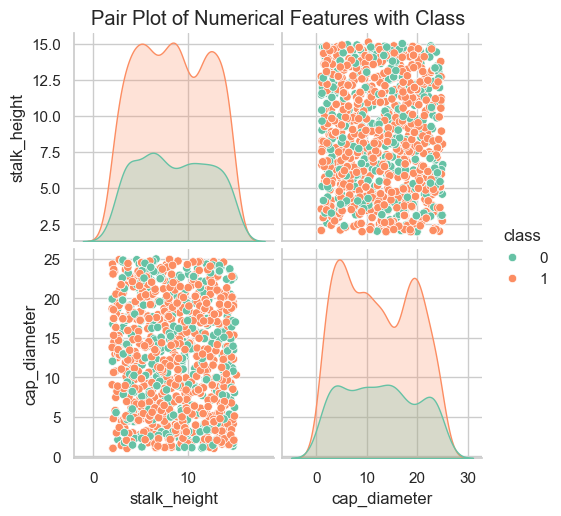

In [24]:
# Visualizing pair plots for numerical features and class to see feature relationships
sns.pairplot(df[['stalk_height', 'cap_diameter', 'class']], hue='class', palette='Set2')
plt.suptitle("Pair Plot of Numerical Features with Class", y=1.02)
plt.show()

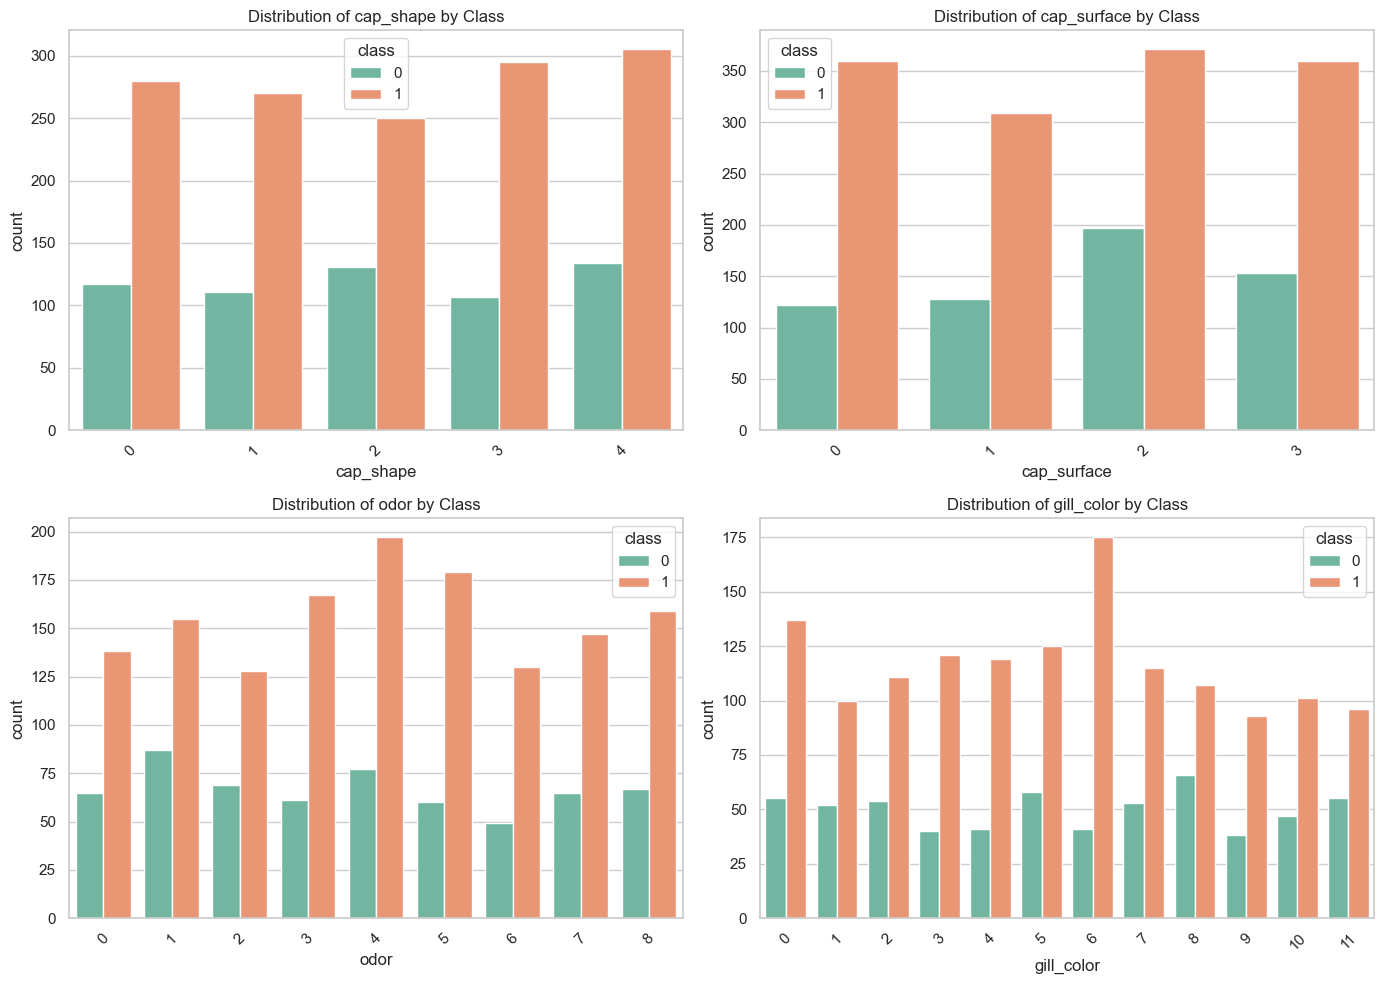

In [25]:
# Visualizing relationships between some categorical features and class
plt.figure(figsize=(14, 10))
categorical_features = ['cap_shape', 'cap_surface', 'odor', 'gill_color']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='class', data=df, palette='Set2')
    plt.title(f"Distribution of {feature} by Class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####  RANDOM FOREST CLASSIFICATION :

In [27]:
# Step 1: Initialize the SVM classifier
svm_model = SVC(kernel='linear')  # Start with a linear kernel as a baseline

# Step 2: Train the SVM model
svm_model.fit(X_train, y_train)

# Step 3: Predict on the test set and evaluate performance
y_pred = svm_model.predict(X_test)

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print each metric
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6675
Precision: 0.6675
Recall: 1.0
F1 Score: 0.800599700149925


In [29]:
# Reduce dimensions to 2D using PCA for visualization purposes
pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)

#### VISUALIZATION OF SVM RESULTS :

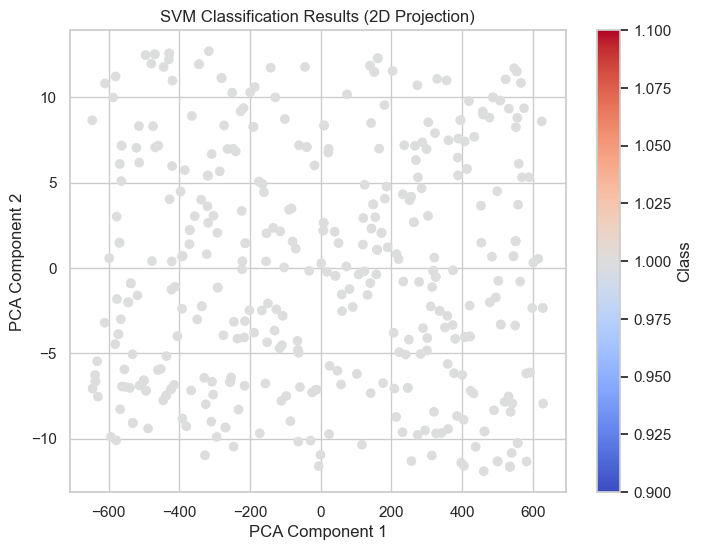

In [31]:
# Plot the classification results
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_pred, cmap='coolwarm', alpha=1)
plt.title("SVM Classification Results (2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Class')
plt.show()

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [38]:
# Initialize the SVM model
svm = SVC()

# Define a reduced parameter grid or use RandomizedSearchCV
param_distributions = {
    'kernel': ['linear', 'rbf'],  # Fewer kernel options to try
    'C': [0.1, 1, 10],  # Reduce the range of 'C' values
    'gamma': ['scale', 'auto']
}

In [40]:
# Set up RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_distributions,scoring='accuracy', cv=5, n_jobs=-1, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy')

In [42]:
# Get the best parameters and the best estimator
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 10}
Best Model: SVC(C=10, gamma='auto')


In [44]:
# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
print("\nClassification Report for Optimized Model:\n", classification_report(y_test, y_pred_best))


Classification Report for Optimized Model:
               precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400




1. **Draws a Line to Separate Classes**: SVMs are like drawing a line (or boundary) that best separates different groups (classes) of data points. Imagine you have two types of fruits (apples and oranges) on a table, and you’re trying to draw a line so that all apples are on one side and all oranges are on the other.

2. **Focuses on Closest Points**: SVM only pays attention to the points closest to the line (called "support vectors") when drawing this boundary. This helps it find the best line even if there’s some overlap between classes.

3. **Good with Many Features**: SVMs work well when there are lots of features (or characteristics) to consider, like in text analysis, where each word in a document can be treated as a feature. This makes them useful for tasks like spam detection or identifying emotions in text.

4. **Can Bend the Line for Complex Data**: With something called a "kernel trick," SVMs can bend the line or boundary to handle data that doesn’t separate in a simple way. This is useful for complex patterns in data, like distinguishing between handwriting styles.

5. **May Struggle with Big Datasets**: SVMs can take a long time to process really large datasets, so they’re usually best for smaller or medium-sized datasets where they can be very accurate without taking too long to calculate.

---------